# Introduction to Data Science Long Assignment 2024/2025

## Data reading

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('customer.csv')
data.reset_index(drop=True, inplace=True)

## Initial analysis

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
import math

In [3]:
data.head()

,Unnamed: 0,custid,sex,is_employed,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,code_column,gas_usage,rooms,recent_move_b
0,7,000006646_03,Male,True,22000.0,Never married,True,Homeowner free and clear,0.0,24,Alabama,1047,210.0,3,F
1,8,000007827_01,Female,NaN,23200.0,Divorced/Separated,True,Rented,0.0,82,Alabama,1047,3.0,6,T
2,9,000008359_04,Female,True,21000.0,Never married,True,Homeowner with mortgage/loan,2.0,31,Alabama,1047,40.0,3,F
3,10,000008529_01,Female,NaN,37770.0,Widowed,True,Homeowner free and clear,1.0,93,Alabama,1047,120.0,2,F
4,11,000008744_02,Male,True,39000.0,Divorced/Separated,True,Rented,2.0,67,Alabama,1047,3.0,2,F


In [4]:
data.info()
print((data["income"] < 0).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72458 entries, 0 to 72457
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      72458 non-null  int64  
 1   custid          72458 non-null  object 
 2   sex             72458 non-null  object 
 3   is_employed     46943 non-null  object 
 4   income          72458 non-null  float64
 5   marital_status  72458 non-null  object 
 6   health_ins      72458 non-null  bool   
 7   housing_type    70772 non-null  object 
 8   num_vehicles    70772 non-null  float64
 9   age             72458 non-null  int64  
 10  state_of_res    72458 non-null  object 
 11  code_column     72458 non-null  int64  
 12  gas_usage       70772 non-null  float64
 13  rooms           72458 non-null  int64  
 14  recent_move_b   70771 non-null  object 
dtypes: bool(1), float64(3), int64(4), object(7)
memory usage: 7.8+ MB
45


In [5]:
# The Unnamed: 0 column resulted from saving the csv file so it can be dropped
data.drop('Unnamed: 0', axis=1, inplace=True) 

# Drop the custid column (its an ID)
data.drop("custid", axis=1, inplace=True)

In [6]:
data.isna().sum()

sex                   0
is_employed       25515
income                0
marital_status        0
health_ins            0
housing_type       1686
num_vehicles       1686
age                   0
state_of_res          0
code_column           0
gas_usage          1686
rooms                 0
recent_move_b      1687
dtype: int64

In [7]:
# Replace the null values in the 'is_employed' column with 'False' (empty means no employment)
data.fillna({'is_employed': 'False'}, inplace=True)

In [8]:
# In the dictionary, we are indicated that the values 1, 2, 3 indicate special cases which we decided to separate
data['gas_payment'] = data['gas_usage'].replace([x for x in data['gas_usage'] if x not in [1, 2, 3]], 0)
data['gas_bill'] = data['gas_usage'].replace([x for x in data['gas_usage'] if x in [1, 2, 3]], 0)

In [9]:
# Print the columns with missing values
print(f' --- PRE CLEANING --- \nColumns with missing values: \n{data.isna().sum()}')
old_len = len(data)
print('Length of the dataframe: ', old_len)   

# Drop the rest of the rows with missing values
data.dropna(axis=0, inplace=True)

print(f'\n --- POST CLEANING --- \nLength of the dataframe: {len(data)}')
print('Number of rows dropped: ', old_len - len(data))

 --- PRE CLEANING --- 
Columns with missing values: 
sex                  0
is_employed          0
income               0
marital_status       0
health_ins           0
housing_type      1686
num_vehicles      1686
age                  0
state_of_res         0
code_column          0
gas_usage         1686
rooms                0
recent_move_b     1687
gas_payment          0
gas_bill          1686
dtype: int64
Length of the dataframe:  72458

 --- POST CLEANING --- 
Length of the dataframe: 70771
Number of rows dropped:  1687


health_ins
True     64338
False     6433
Name: count, dtype: int64


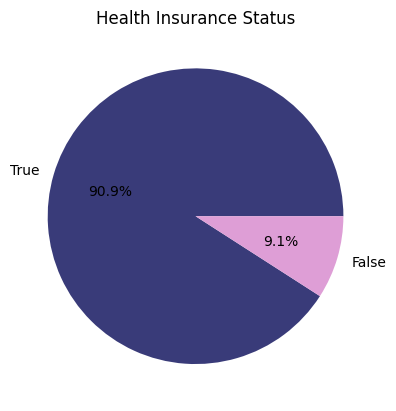

In [10]:
print(data.health_ins.value_counts())

data.health_ins.value_counts().plot(kind='pie', 
                                    autopct='%1.1f%%', 
                                    title='Health Insurance Status',
                                    ylabel='',
                                    colormap='tab20b')
                                    
plt.show()

In [11]:
# We can see all the different scales of the int columns of the data
data.describe()

,income,num_vehicles,age,code_column,gas_usage,rooms,gas_payment,gas_bill
count,7.077100e+04,70771.000000,70771.000000,70771.000000,70771.000000,70771.000000,70771.000000,70771.000000
mean,4.263217e+04,2.066849,49.214113,3289.410832,41.231041,3.495146,1.264642,39.966399
std,5.864206e+04,1.170058,17.932735,2663.474061,63.149606,1.706561,1.393938,63.929786
min,-6.900000e+03,0.000000,0.000000,131.000000,1.000000,1.000000,0.000000,0.000000
25%,1.130000e+04,1.000000,34.000000,1305.000000,3.000000,2.000000,0.000000,0.000000
50%,2.749000e+04,2.000000,48.000000,2269.000000,10.000000,3.000000,0.000000,10.000000
75%,5.206000e+04,3.000000,62.000000,4979.000000,60.000000,5.000000,3.000000,60.000000
max,1.257000e+06,6.000000,120.000000,8962.000000,570.000000,6.000000,3.000000,570.000000


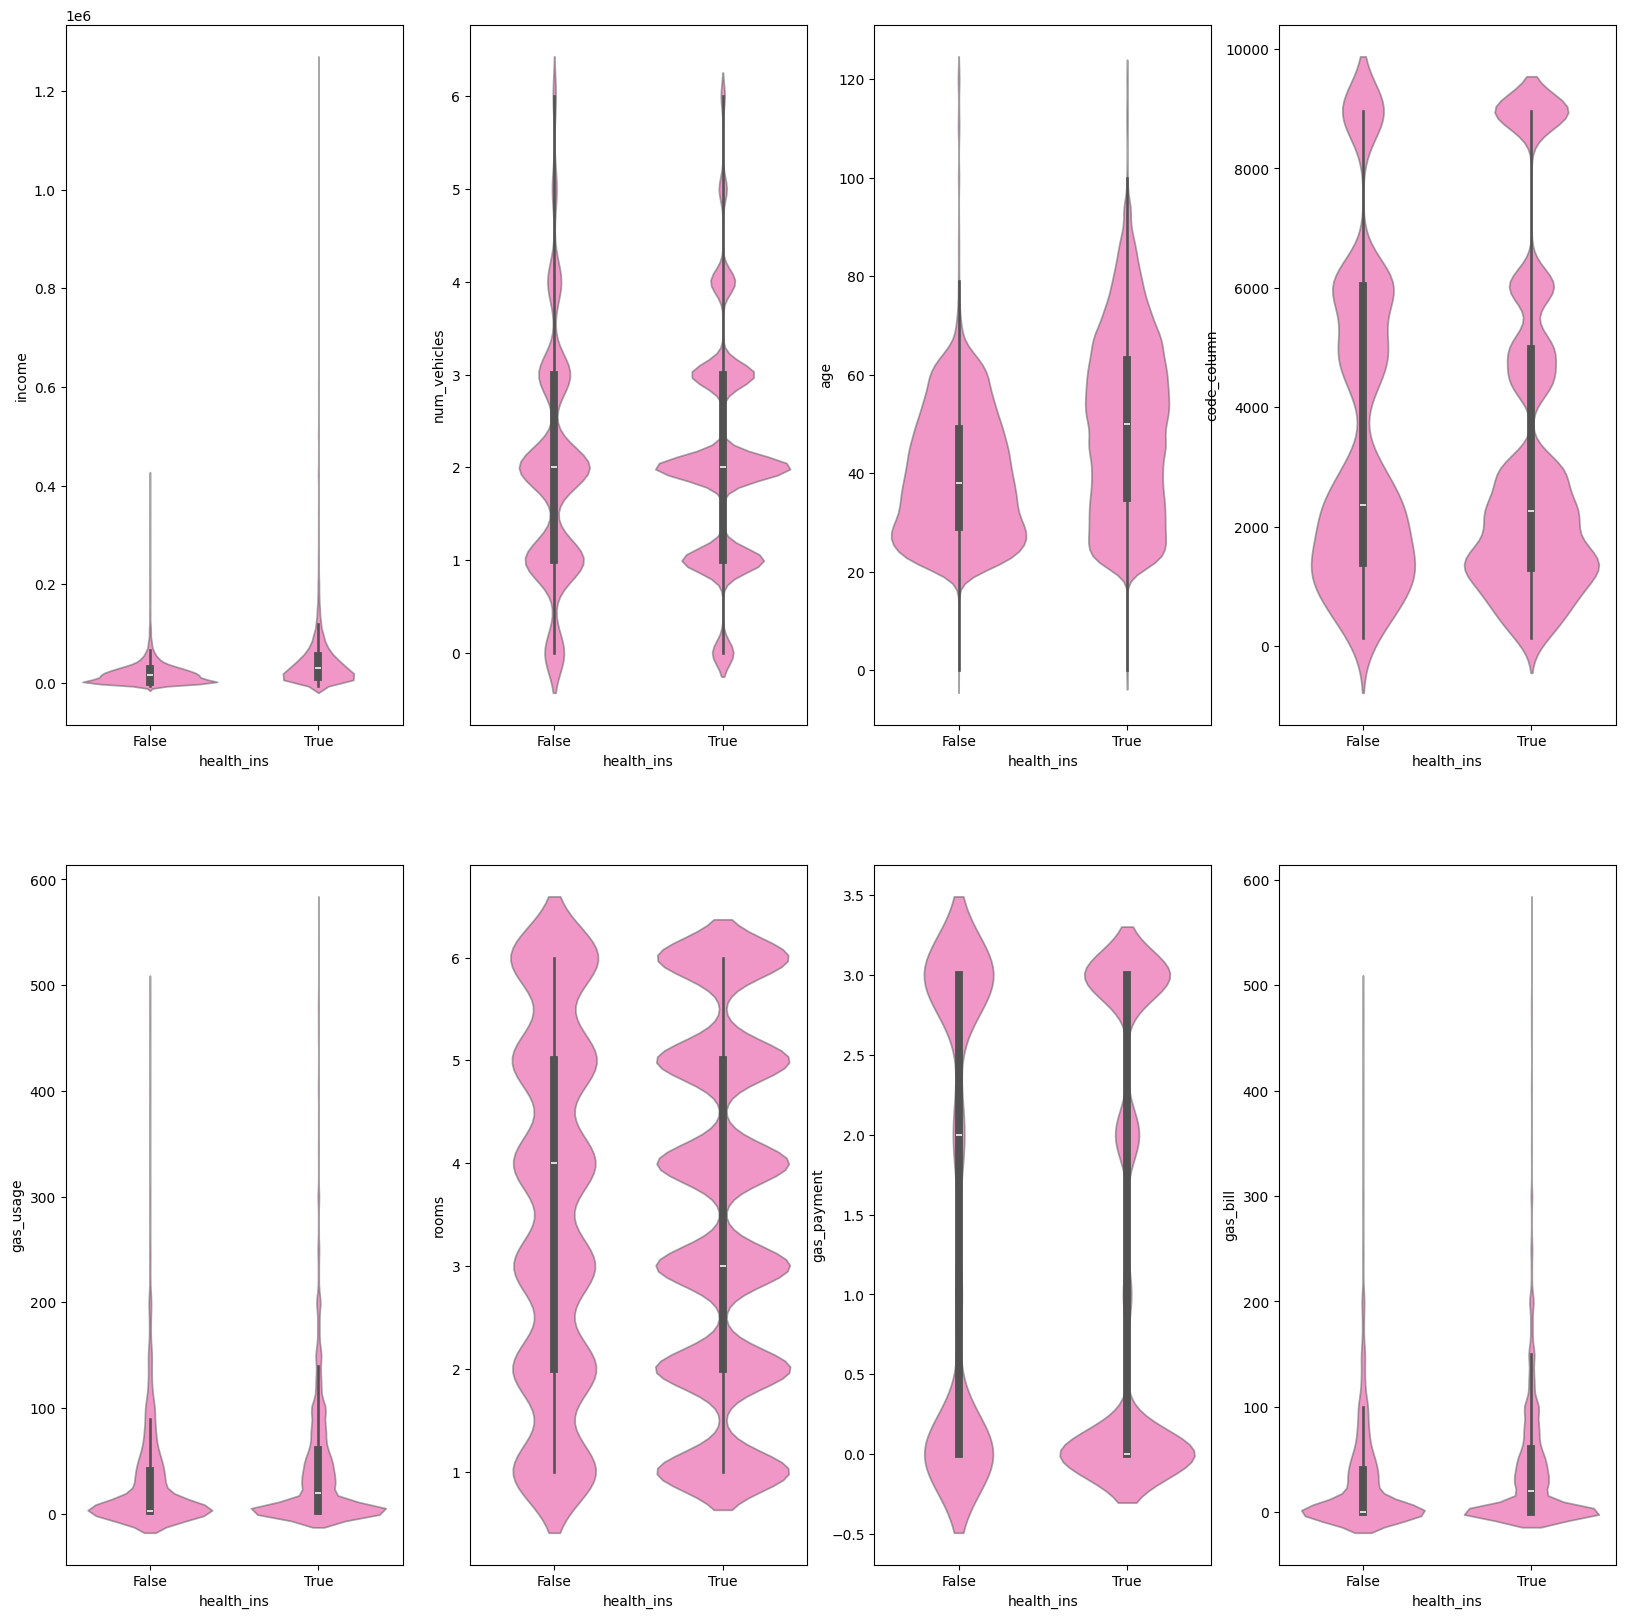

In [12]:
fig, ax = plt.subplots(2,4, figsize = (20,20))

for i, col in enumerate(data.select_dtypes(include = ['float64', 'int64']).columns):
    sns.violinplot(data=data,x = 'health_ins', y = col, ax=ax[i//4, i%4], color='deeppink', alpha=0.5)
plt.show()

In [13]:
# Columns chosen to be normalized
cols_norm = ['income', 'gas_bill']

/home/barbara/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


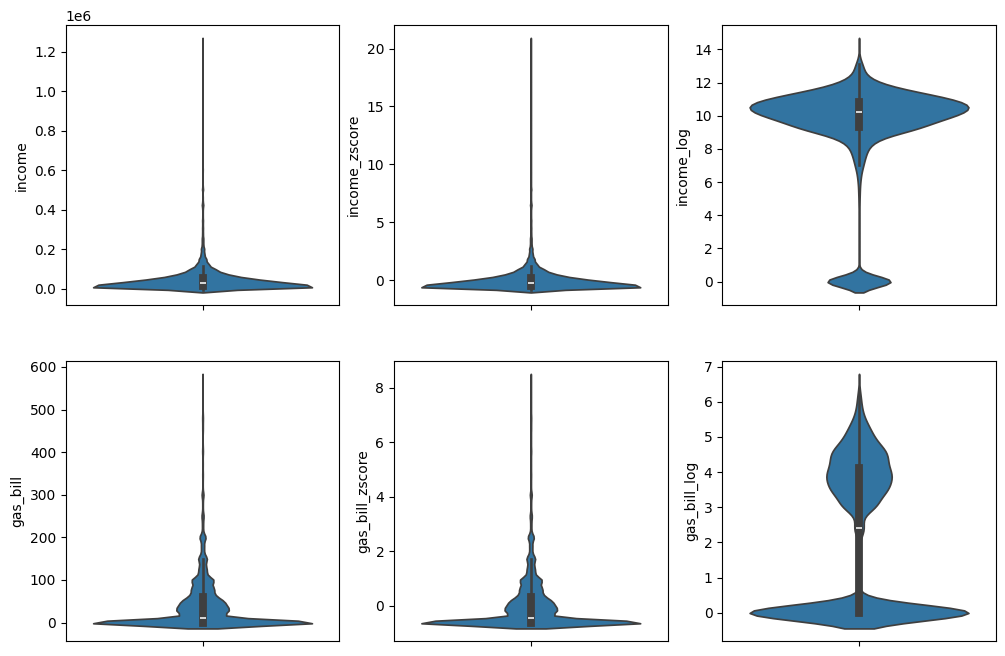

In [14]:
fig, ax = plt.subplots(2,3, figsize=(12,8))

for i, col in enumerate(cols_norm):
    data[f'{col}_zscore'] = data[[col]].apply(zscore)
    data[f'{col}_log'] = np.log1p(data[col])

    sns.violinplot(data=data[col], ax = ax[i, 0])
    sns.violinplot(data=data[f'{col}_zscore'], ax = ax[i, 1])
    sns.violinplot(data=data[f'{col}_log'], ax = ax[i, 2])
plt.show()

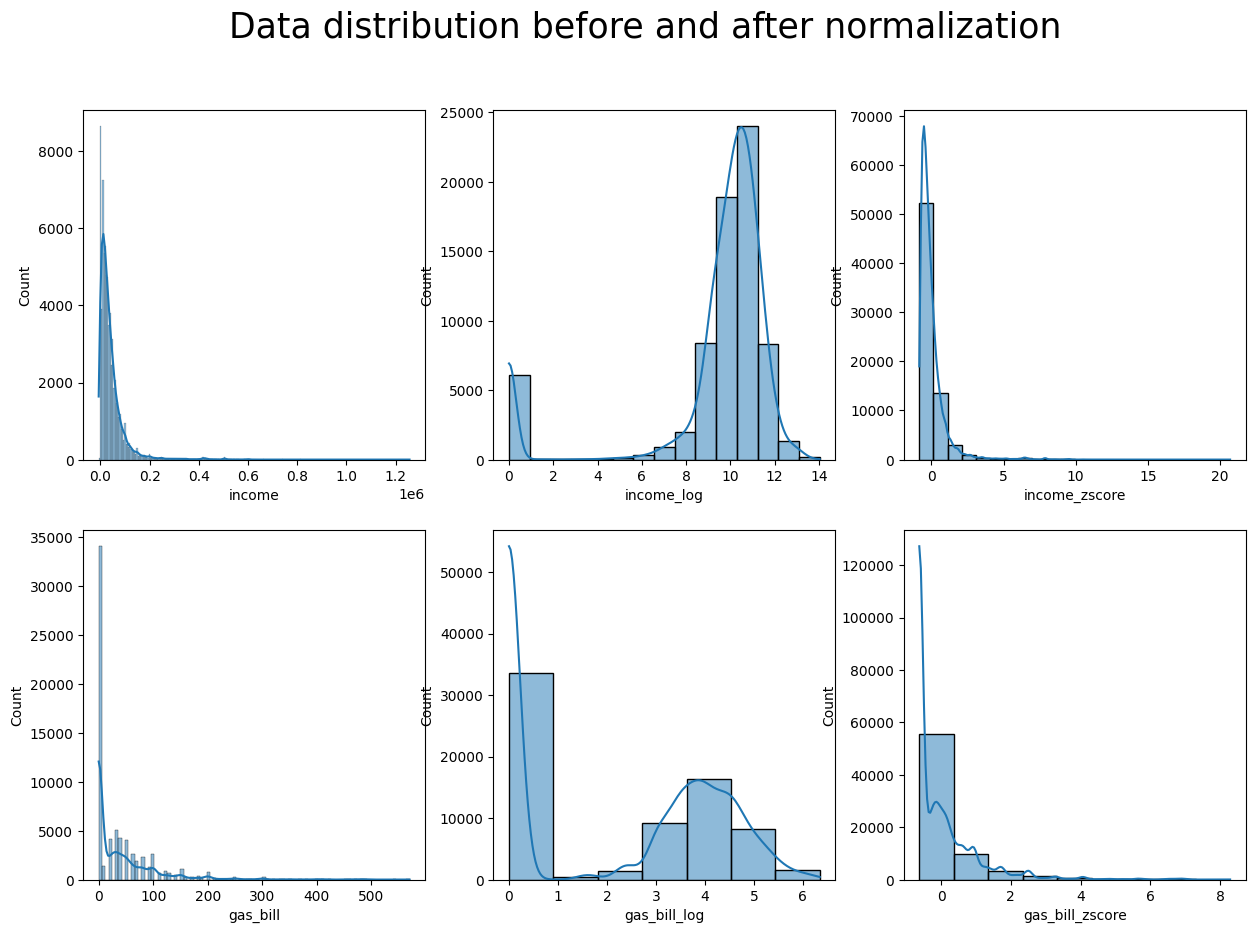

In [15]:
fig, ax = plt.subplots(2,3, figsize=(15,10))
fig.suptitle('Data distribution before and after normalization', fontsize=25)

for i, col in enumerate(cols_norm):
    # Use scott's method to determine the number of bins (used in excel and R)
    width = math.ceil(3.5 * (data[col].std()) / (math.pow(len(data), 1/3)))
    n = math.ceil((data[col].max() - data[col].min()) / width)

    sns.histplot(data=data[col], 
                 ax = ax[i, 0], 
                 bins=n,
                 kde=True)

    width = math.ceil(3.5 * (data[f'{col}_log'].std()) / (math.pow(len(data), 1/3)))
    n = math.ceil((data[f'{col}_log'].max() - data[f'{col}_log'].min()) / width)

    sns.histplot(data=data[f'{col}_log'], 
                 ax = ax[i, 1],
                 bins=n, 
                 kde=True)
    
    width = math.ceil(3.5 * (data[f'{col}_zscore'].std()) / (math.pow(len(data), 1/3)))
    n = math.ceil((data[f'{col}_zscore'].max() - data[f'{col}_zscore'].min()) / width)

    sns.histplot(data=data[f'{col}_zscore'], 
                 ax = ax[i, 2],
                 bins=n, 
                 kde=True)
    
plt.show()

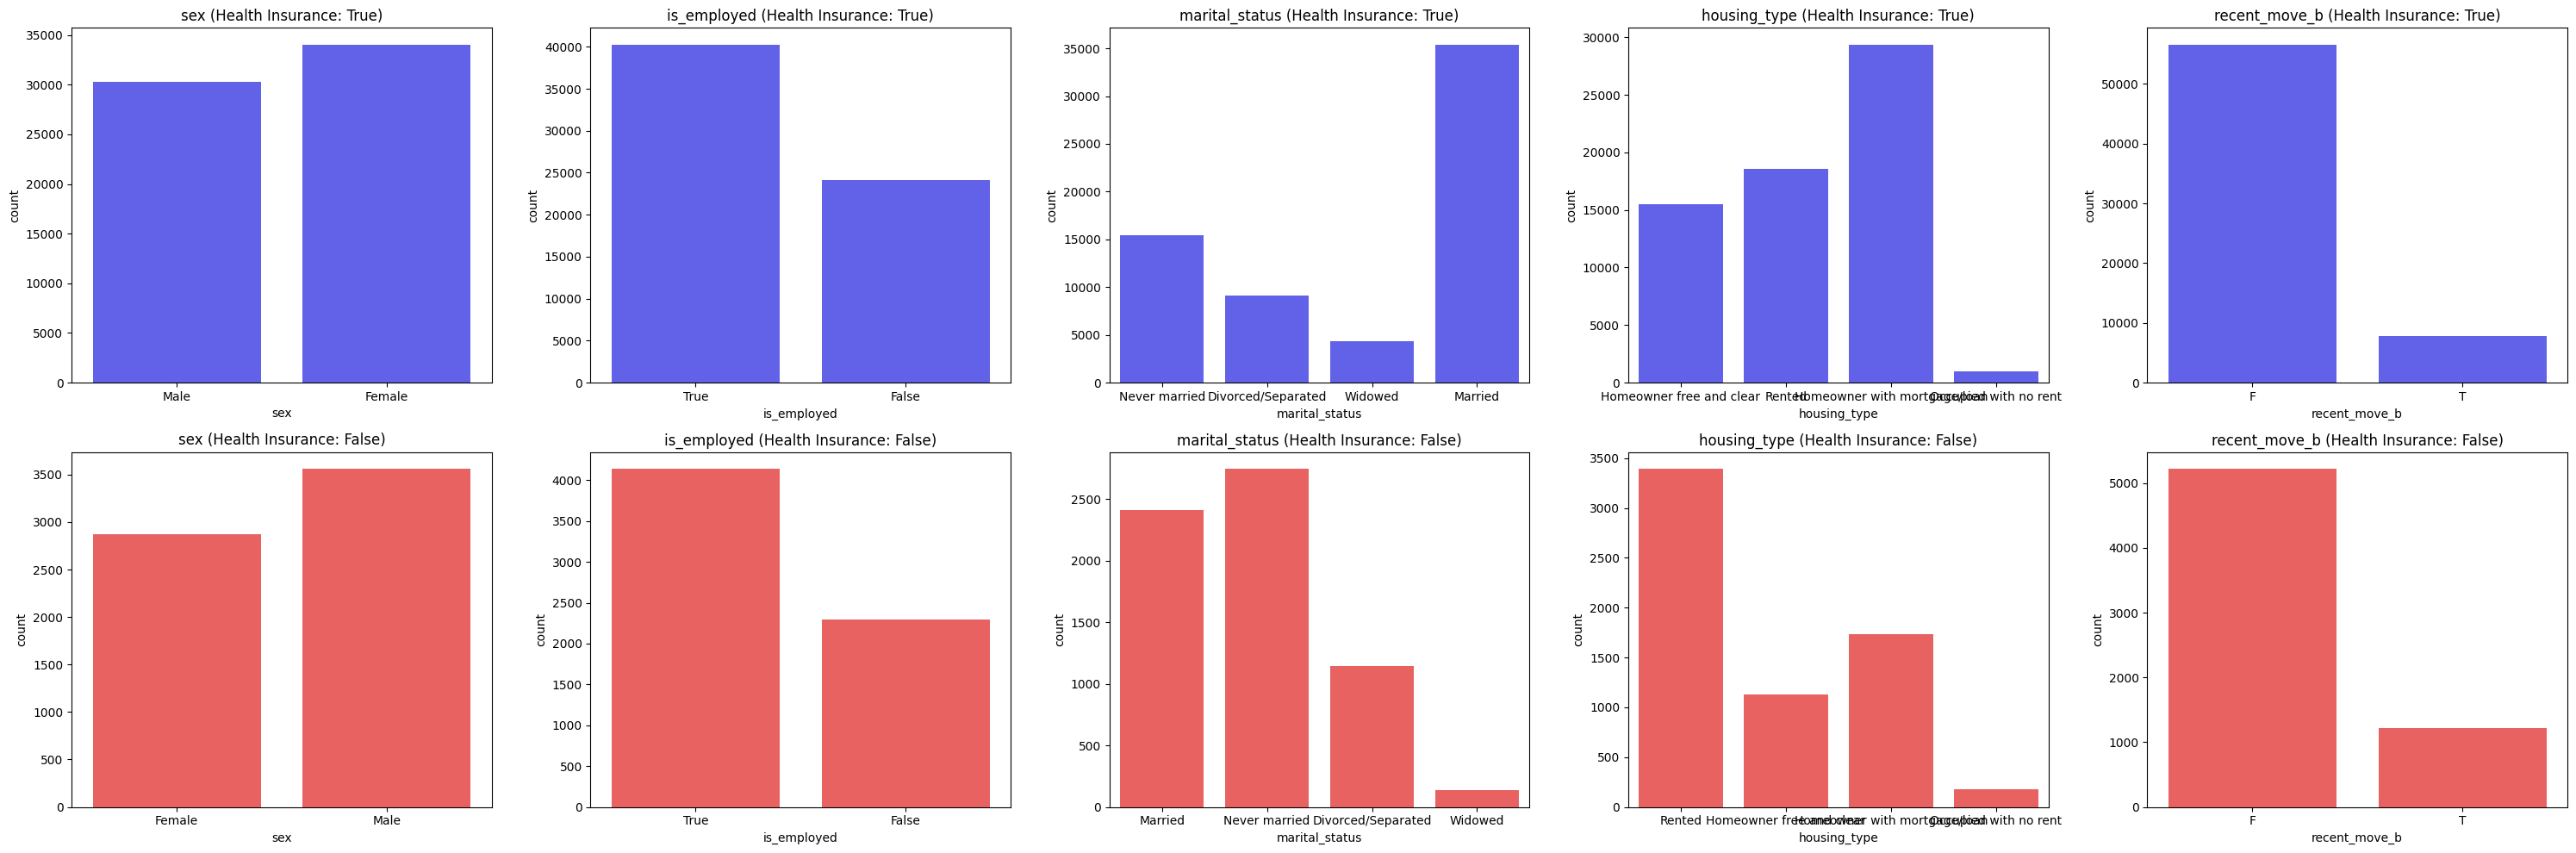

In [16]:
categorical_columns = ['sex', 'is_employed', 'marital_status', 'housing_type', 'recent_move_b']

fig, ax = plt.subplots(2, 5, figsize=(30, 10))  # Adjust number of subplots as needed

# Flatten the axis array for easier indexing
ax = ax.flatten()

# Iterate over the columns and plot the countplot for both True and False values of 'health_ins'
i = 0
for col in categorical_columns:
    # For health_insurance True
    sns.countplot(data=data[data['health_ins'] == True],
                  x=col, ax=ax[i], color='blue', alpha=0.7)
    ax[i].set_title(f'{col} (Health Insurance: True)')
    
    # For health_insurance False (using a different subplot)
    sns.countplot(data=data[data['health_ins'] == False],
                  x=col, ax=ax[i + len(categorical_columns)], color='red', alpha=0.7)
    ax[i + len(categorical_columns)].set_title(f'{col} (Health Insurance: False)')

    i += 1
    
plt.tight_layout()
plt.show()



In [17]:
#Label encoder das categorical features pois algoritmos de ML trabalham melhor com valores numéricos
data.drop(['state_of_res'], inplace=True, axis=1)
categorical_features = data.select_dtypes(include=['object', 'category', 'bool'])
enc=LabelEncoder()

for feature in categorical_features:
    if data[feature].dtype in ['object', 'category'] and feature!= "housing_type" and feature!="health_ins":
        data[feature] = data[feature].str.upper()
    data[f"{feature}_num"] = enc.fit_transform(data[feature].astype(str))

data['housing_type'] = data['housing_type'].str.upper().str.strip()

manual_mapping = {
    "HOMEOWNER FREE AND CLEAR": 4,
    "HOMEOWNER WITH MORTGAGE/LOAN": 3,
    "RENTED": 2,
    "OCCUPIED WITH NO RENT": 1
}

data['housing_type_num'] = data['housing_type'].map(manual_mapping)

# Verify the result
print(data[['housing_type', 'housing_type_num']].drop_duplicates())


                    housing_type  housing_type_num
0       HOMEOWNER FREE AND CLEAR                 4
1                         RENTED                 2
2   HOMEOWNER WITH MORTGAGE/LOAN                 3
10         OCCUPIED WITH NO RENT                 1


In [18]:
#mostrar que valor se tornou em que numero
for feature in categorical_features:
    encoded_column = f"{feature}_num"
    print(f"Original vs Encoded for '{feature}':\n")
    # Create a temporary DataFrame to display side by side
    comparison_df = data[[feature, encoded_column]].drop_duplicates().sort_values(by=encoded_column)
    print(comparison_df)
    print("\n" + "-"*50 + "\n")

Original vs Encoded for 'sex':

      sex  sex_num
1  FEMALE        0
0    MALE        1

--------------------------------------------------

Original vs Encoded for 'is_employed':

  is_employed  is_employed_num
1       FALSE                0
0         NaN                1

--------------------------------------------------

Original vs Encoded for 'marital_status':

       marital_status  marital_status_num
1  DIVORCED/SEPARATED                   0
5             MARRIED                   1
0       NEVER MARRIED                   2
3             WIDOWED                   3

--------------------------------------------------

Original vs Encoded for 'health_ins':

   health_ins  health_ins_num
6       False               0
0        True               1

--------------------------------------------------

Original vs Encoded for 'housing_type':

                    housing_type  housing_type_num
10         OCCUPIED WITH NO RENT                 1
1                         RENTED         

In [19]:
data.drop(['income', 'gas_bill', 'income_log', 'gas_bill_log', 'gas_usage'], inplace=True, axis=1)
data.drop(columns=categorical_features, inplace=True)

In [20]:
#fazer feature polinomial que demonstra as posses (riqueza atual) da pessoa

data["polinomial"] = 3*data["rooms"]+2*data["num_vehicles"]+2*data["is_employed_num"]+3*data["housing_type_num"]

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70771 entries, 0 to 72456
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   num_vehicles        70771 non-null  float64
 1   age                 70771 non-null  int64  
 2   code_column         70771 non-null  int64  
 3   rooms               70771 non-null  int64  
 4   gas_payment         70771 non-null  float64
 5   income_zscore       70771 non-null  float64
 6   gas_bill_zscore     70771 non-null  float64
 7   sex_num             70771 non-null  int64  
 8   is_employed_num     70771 non-null  int64  
 9   marital_status_num  70771 non-null  int64  
 10  health_ins_num      70771 non-null  int64  
 11  housing_type_num    70771 non-null  int64  
 12  recent_move_b_num   70771 non-null  int64  
 13  polinomial          70771 non-null  float64
dtypes: float64(5), int64(9)
memory usage: 8.1 MB


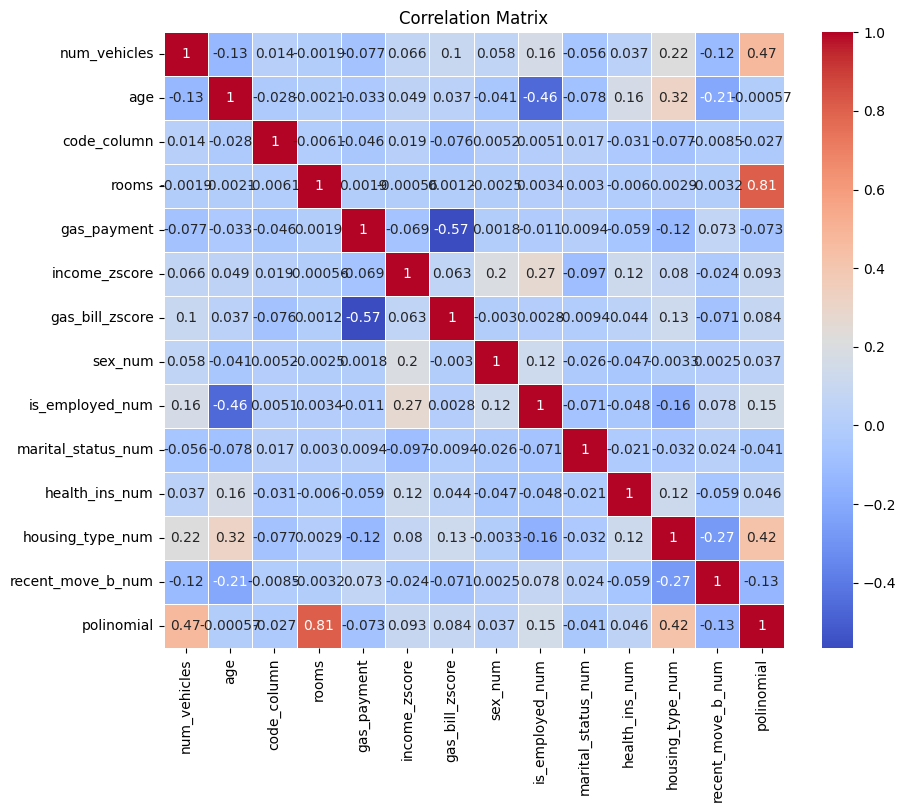

In [22]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Point Biserial Correlation
- Age and income are highly statistically significant features
- Rooms shows no significant correlation with the binary class, given its very weak correlation and a high p-value

In [23]:
from scipy import stats


for col in numerical_data.columns:
    print('---', col, '---')
# Assuming 'code_column' is the numerical column and 'state_column' is binary
    correlation, p_value = stats.pointbiserialr(data[col], data['health_ins_num'])
    print("Point Biserial Correlation:", correlation)
    print("p-value:", p_value)

--- num_vehicles ---
Point Biserial Correlation: 0.03655066765175329
p-value: 2.322568967475042e-22
--- age ---
Point Biserial Correlation: 0.16432390359206994
p-value: 0.0
--- code_column ---
Point Biserial Correlation: -0.030629912828155376
p-value: 3.6335712838973943e-16
--- rooms ---
Point Biserial Correlation: -0.005954304129640205
p-value: 0.11319398400170269
--- gas_payment ---
Point Biserial Correlation: -0.058556176627664984
p-value: 8.421022180471517e-55
--- income_zscore ---
Point Biserial Correlation: 0.121028033796555
p-value: 4.285997849640218e-229
--- gas_bill_zscore ---
Point Biserial Correlation: 0.04380611890519345
p-value: 2.063234625416194e-31
--- sex_num ---
Point Biserial Correlation: -0.04710413747495109
p-value: 4.638860633262876e-36
--- is_employed_num ---
Point Biserial Correlation: -0.047921541114794936
p-value: 2.9019181773924937e-37
--- marital_status_num ---
Point Biserial Correlation: -0.021444407589026507
p-value: 1.160890848684305e-08
--- health_ins_num

In [24]:
#p-value <= 0.5
#data.drop('rooms', axis=1, inplace=True)
#numerical_data.drop('rooms', axis=1, inplace=True)

## Feature engineering

In [25]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [26]:
data_knn = data.replace({'age': 0}, np.nan)

print(data_knn["age"].isna().sum())

76


In [27]:
num_cols = data_knn.select_dtypes(include=['float64', 'int64']).columns.to_list()

num_cols.remove('age')

# Initialize the StandardScaler
#scaler = StandardScaler()#

# Fit and transform the numerical data
#data_knn[num_cols] = scaler.fit_transform(data_knn[num_cols])

In [28]:
#data_knn = pd.get_dummies(data_knn, drop_first=True)
#data_knn.head()

In [29]:
imputer = KNNImputer(n_neighbors=5)

imputed_data = pd.DataFrame(imputer.fit_transform(data_knn), columns=data_knn.columns)


In [30]:
imputed_data['age']

0        24.0
1        82.0
2        31.0
3        93.0
4        67.0
         ... 
70766    32.0
70767    25.0
70768    86.0
70769    50.0
70770    61.0
Name: age, Length: 70771, dtype: float64

In [31]:
imputed_data['age'] = np.round(imputed_data['age'])
imputed_data['age'].unique()

array([ 24.,  82.,  31.,  93.,  67.,  76.,  26.,  73.,  27.,  54.,  61.,
        64.,  55.,  65.,  33.,  47.,  68.,  46.,  58.,  43.,  41.,  62.,
        21.,  78.,  32.,  59.,  29.,  70.,  30.,  28.,  86.,  35.,  34.,
        40.,  72.,  60.,  25.,  79.,  22.,  42.,  44.,  81.,  50.,  45.,
        63.,  57.,  39.,  71.,  38.,  49.,  69.,  37.,  66.,  53.,  36.,
        23.,  75.,  88.,  51.,  85.,  52.,  83.,  77.,  56.,  48., 100.,
        74.,  89.,  80.,  84.,  87., 120.,  91., 110., 114.,  94.,  90.,
        96.,  92.,  95.])

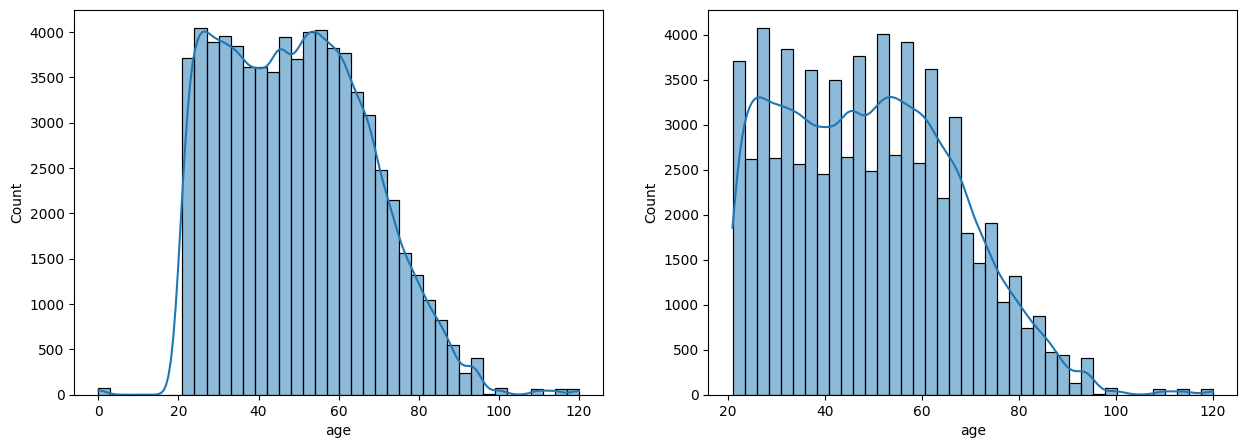

In [32]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))

sns.histplot(data=data.age, bins=40, kde=True, ax=ax[0])

sns.histplot(data=imputed_data.age, bins=40, kde=True, ax=ax[1])
plt.show()

In [33]:
data['age'] = imputed_data['age']
data.head()

,num_vehicles,age,code_column,rooms,gas_payment,income_zscore,gas_bill_zscore,sex_num,is_employed_num,marital_status_num,health_ins_num,housing_type_num,recent_move_b_num,polinomial
0,0.0,24.0,1047,3,0.0,-0.351835,2.659712,1,1,2,1,4,0,23.0
1,0.0,82.0,1047,6,3.0,-0.331371,-0.625165,0,0,0,1,2,1,24.0
2,2.0,31.0,1047,3,0.0,-0.368887,0.000526,0,1,2,1,3,0,24.0
3,1.0,93.0,1047,2,0.0,-0.082913,1.251907,0,0,3,1,4,0,20.0
4,2.0,67.0,1047,2,3.0,-0.061938,-0.625165,1,1,0,1,2,0,18.0


## Model implementation